# DZ 1 Немного EDA для маркетинговых данных

Вам предложены данные iFood — приложения для доставки еды в Бразилии, представленного более чем в тысяче городов.
Поддержание высокой вовлеченности клиентов является важной задачей для компании. Для того, чтобы создавать новые предложения и проводить качественные рекламные кампании, необходимо понимать особенности и потребности целевой аудитории. Для этого были собраны данные о клиентах, использующих приложение. Вам предстоит выявить особенности людей, пользующихся данным приложением и найти интересные закономерности.

Почитать про компанию можно, например, на википедии:) https://en.wikipedia.org/wiki/IFood

Описание данных:
    
* AcceptedCmp1 - 1 if customer accepted the offer in the 1st campaign, 0 otherwise
* AcceptedCmp2 - 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
* AcceptedCmp3 - 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
* AcceptedCmp4 - 1 if customer accepted the offer in the 4th campaign, 0 otherwise
* AcceptedCmp5 - 1 if customer accepted the offer in the 5th campaign, 0 otherwise
* Response (target) - 1 if customer accepted the offer in the last campaign, 0 otherwise
* Complain - 1 if customer complained in the last 2 years
* DtCustomer - date of customer’s enrolment with the company
* Education - customer’s level of education
* Marital - customer’s marital status
* Kidhome - number of small children in customer’s household
* Teenhome - number of teenagers in customer’s household
* Income - customer’s yearly household income
* MntFishProducts - amount spent on fish products in the last 2 years
* MntMeatProducts - amount spent on meat products in the last 2 years
* MntFruits - amount spent on fruits products in the last 2 years
* MntSweetProducts - amount spent on sweet products in the last 2 years
* MntWines - amount spent on wine products in the last 2 years
* MntGoldProds - amount spent on gold products in the last 2 years
* NumDealsPurchases - number of purchases made with discount
* NumCatalogPurchases - number of purchases made using catalogue
* NumStorePurchases - number of purchases made directly in stores
* NumWebPurchases - number of purchases made through company’s web site
* NumWebVisitsMonth - number of visits to company’s web site in the last month
* Recency - number of days since the last purchase

## Немного важной информации:

1. Обязательно гуглите! Использование дополнительных методов не карается, но приветствуется (если вы сможете объяснить принцип их работы) Однако, если вы нашли что-то полезное и хотите скопировать себе - сделав это, добавьте в начале ячейки ссылку на источник. В противном случае это будет считаться плагиатом.

2. Плагиат не допускается и строго наказывается. Единственное возможное исключение - код, заимствованный из интернета, с ссылкой на источник.

## Задание 1 (1 балл): предобработка данных

Откройте предложенные данные.

In [1]:
import pandas as pd
import numpy as np 

pd.options.mode.chained_assignment = None 


df = pd.read_csv("marketing.csv", parse_dates=['Dt_Customer'])
df.info()
st = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
      'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'Income']


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2216 non-null   object        
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

Изучите ваши данные. Какие типы данных здесь представлены? Все ли данные считались в корректном и удобном для работы формате? Если нет, то с какими данными есть проблемы?

In [2]:
# В столбце Income есть пропуски, также корректнее было бы предстваить значения этого столбца в типе float

Теперь необходимо привести некоторые данные в корректный вид. Преобразуйте признак income так, чтобы значения этого признака были обычными вещественными числами (float)

In [3]:

df['Income'] = df['Income'].str.replace('\$','', regex=True)
df['Income'] = df['Income'].str.replace('\,','', regex=True)
df['Income'] = df.Income.astype('float64')
df.head()
#Убрали $ и запятые, привели к типу float64

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,32474.0,1,1,2014-05-11,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,21474.0,1,0,2014-04-08,0,6,...,2,7,1,0,0,0,0,1,0,SP


Кроме того, даты нам было бы удобнее представить в корректном формате ГГГГ-ММ-ДД. Преобразуйте данные с датами в соответствующий вид.

In [4]:
# На первом этапе даты были автоматически преобразованы
# https://newtechaudit.ru/gruzi-daty-krasivo/


## Задание 2 (1.5 балла): пропуски и выбросы

Исследуйте данные на предмет пропусков и выбросов. Есть ли в данных пропуски? Сколько и в каких признаках? Как вы будете их обрабатывать? Обработайте пропуски, пояснив выбранную вами стратегию обработки.

_важно: просто удалить - это не стратегия обработки, придумайте что-то другое_

In [5]:
# найдено 24 пропуска в столбце Income
df['Income'] = df['Income'].fillna(df['Income'].mean()) # заменим пропуск на средние значения по столбцу
df.isnull().sum()  # суммарное количество пропусков в каждом столбце

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Response               0
Complain               0
Country                0
dtype: int64

Исследуйте данные на предмет выбросов и удалите их, если они есть. Если выбросы есть - продемонстрируйте это численно и с помощью визуализаций. Прокомментируйте, как вы ищете выбросы, и почему их стоит удалить.

<AxesSubplot:>

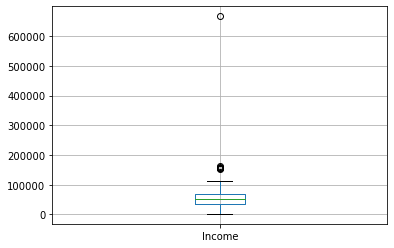

In [6]:

# Выброс найден при помощи boxplot

df.boxplot(column ='Income')




In [7]:
df['Income'].describe()

# ПРовирим наличие выброса через статистику

count      2240.000000
mean      52247.251354
std       25037.797168
min        1730.000000
25%       35538.750000
50%       51741.500000
75%       68289.750000
max      666666.000000
Name: Income, dtype: float64

In [8]:
for stl in st:
    for x in [stl]:
        q75,q25 = np.percentile(df.loc[:,x],[75,25])
        intr_qr = q75-q25

        max = q75+(1.5*intr_qr)
        min = q25-(1.5*intr_qr)

        df.loc[df[x] < min,x] = np.nan
        df.loc[df[x] > max,x] = np.nan
    df[stl] = df[stl].fillna(df[stl].mean()) # заменим пропуск на средние значения по столбцу

# st - массив со столбцами, в которых мы ищем вбросы, был задан на 1 этапе
# Найдем все выбросы в во всех столбцах , используя межквартальный размах и заменим их средним значением
# Идея с сайта https://pythobyte.com/detection-removal-outliers-in-python-adaa857e/ 


In [9]:
df['Income'].describe()



count      2240.000000
mean      51640.236126
std       20564.922145
min        1730.000000
25%       35538.750000
50%       51640.236126
75%       68098.250000
max      113734.000000
Name: Income, dtype: float64

## Задание 3 (1 балл): новые признаки

Подумайте, какие осмысленные признаки можно создать из имеющихся? Придумайте как минимум 2 и добавьте их, содержательно описав, почему вы их добавляете и по какому принципу.

In [10]:
df['People_Count'] = df['Marital_Status']

df = df.replace({'People_Count' : {'Alone' : 1,
                             'Absurd' : 1,
                            'Divorced': 1,
                             'Married': 2,
                             'Single': 1,
                             'Together': 2,
                             'Widow': 1,
                             'YOLO': 1}})
df['People_Count'] = df['People_Count'] + df['Kidhome'] + df['Teenhome']
# Количество человек в семье

In [11]:
# Сумма, потраченая на все категории товаров, деленная на на количество человек в семье
df['Mnt'] =  (df['MntFishProducts'] + df['MntFruits'] + df['MntSweetProducts'] + df['MntWines']+ df['MntGoldProds'] 
+ df['MntMeatProducts']) / df['People_Count']
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,People_Count,Mnt
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189.0,...,0,0,0,0,0,1,0,SP,1,739.202543
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464.0,...,0,0,0,0,1,1,0,CA,1,577.000000
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134.0,...,0,0,0,0,0,0,0,US,3,83.666667
3,1386,1967,Graduation,Together,32474.0,1,1,2014-05-11,0,10.0,...,0,0,0,0,0,0,0,AUS,4,2.750000
4,5371,1989,Graduation,Single,21474.0,1,0,2014-04-08,0,6.0,...,1,0,0,0,0,1,0,SP,2,45.500000


## Задание 4 (2.5 балла): время статистики!

Рассчитайте все описательные статистики для категориальных переменных (есть специальный метод, который выводит все доступные статистики разом - это то, что нужно!). Опишите, какие выводы вы можете сделать из полученных данных.

In [12]:
cat_df = df[['Education','Marital_Status','Country']]
cat_df.describe()


#Большая часть покупателей - семьи, Испанцы с образованием уровня graduation


,Education,Marital_Status,Country
count,2240,2240,2240
unique,5,8,8
top,Graduation,Married,SP
freq,1127,864,1095


Рассчитайте все описательные статистики для количественных переменных.  (есть специальный метод, который выводит все доступные статистики разом - это то, что нужно!) Опишите, какие выводы вы можете сделать из полученных данных (хотя бы про какие-то 3 признака).

In [13]:
count_df = df[['NumDealsPurchases','NumCatalogPurchases','NumStorePurchases','NumWebPurchases']]
count_df.describe()
# В среднем, люди больше всего покупают через оффлайн магазин,через дисконт меньше всего


,NumDealsPurchases,NumCatalogPurchases,NumStorePurchases,NumWebPurchases
count,2240.000000,2240.000000,2240.000000,2240.000000
mean,2.064531,2.547587,5.790179,4.046512
std,1.339947,2.629515,3.250958,2.625940
min,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,3.000000,2.000000
50%,2.000000,2.000000,5.000000,4.000000
75%,3.000000,4.000000,8.000000,6.000000
max,6.000000,10.000000,13.000000,11.000000


Выберите 3 интересующих вас количественных признака и рассчитайте релевантные с вашей точки зрения описательные статистики для этих признаков, сгруппировав данные по семейному положению, образованию, стране. Какие закономерности вы можете отметить? Как их можно проинтерпретировать? 

In [14]:
country_df = df[['Mnt','Country']]

country_df['MntWines'] = df['MntWines'] / df['People_Count'] / df['Mnt'] 
country_df['MntMeatProducts'] = df['MntMeatProducts'] / df['People_Count'] / df['Mnt']
country_df['MntFishProducts'] = df['MntFishProducts'] / df['People_Count']/  df['Mnt']
country_df.groupby('Country').mean().sort_values(by='Mnt')


# Мексиканцы тратят больше остальных наций на покупки, причем стоимсть вин составляют большую часть стоимость




,Mnt,MntWines,MntMeatProducts,MntFishProducts
Country,,,,
IND,222.368135,0.466378,0.249791,0.068750
AUS,222.518515,0.484619,0.246030,0.066134
CA,248.924193,0.504296,0.230724,0.066863
SP,251.483727,0.501029,0.236127,0.063189
GER,257.126191,0.467326,0.248275,0.065498
SA,269.695944,0.500404,0.252707,0.060259
US,287.812261,0.490199,0.265076,0.057698
ME,591.768515,0.605540,0.285208,0.023776


In [15]:
marital_df = df[['Mnt','Marital_Status']]


marital_df['MntWines'] = df['MntWines'] / df['People_Count'] / df['Mnt'] 
marital_df['MntMeatProducts'] = df['MntMeatProducts'] / df['People_Count'] / df['Mnt']
marital_df['MntFishProducts'] = df['MntFishProducts'] / df['People_Count']/  df['Mnt']


marital_df.groupby('Marital_Status').mean().sort_values(by='MntMeatProducts')
# Люди со статусом YOLO тратят больше всех на алкоголь и в разы меньше остальных тратит на рыбу. 
# Им стоит предлагать только алкоголь
# Исходя из статистики, люди со статусом Alone больше тратят на рыбу, чем осталные.
# Следовательно, им нужно предлагать больше рыбы




,Mnt,MntWines,MntMeatProducts,MntFishProducts
Marital_Status,,,,
YOLO,212.000000,0.759434,0.117925,0.009434
Alone,90.500000,0.402413,0.169098,0.098372
Widow,418.055238,0.545209,0.222949,0.064587
Married,186.179576,0.492472,0.239640,0.065107
Divorced,343.946447,0.512617,0.240739,0.057243
Together,197.131363,0.504011,0.244957,0.062360
Single,366.724422,0.474831,0.245400,0.065312
Absurd,792.466995,0.464384,0.376919,0.028402


In [16]:
edu_df = df[['Mnt','Education']]

edu_df['MntWines'] = df['MntWines'] / df['People_Count'] / df['Mnt'] 
edu_df['MntMeatProducts'] = df['MntMeatProducts'] / df['People_Count'] / df['Mnt']
edu_df['MntFishProducts'] = df['MntFishProducts'] / df['People_Count']/  df['Mnt']


edu_df.groupby('Education').mean().sort_values(by='Mnt')
# Группировка по образованию
# Чем выше уровень обрасования, тем больше человек любит вино



,Mnt,MntWines,MntMeatProducts,MntFishProducts
Education,,,,
Basic,32.974297,0.056929,0.147343,0.201106
2n Cycle,203.848490,0.357711,0.241985,0.097143
Graduation,252.765560,0.465388,0.257807,0.069177
Master,267.620616,0.559621,0.230738,0.043394
PhD,284.858149,0.623585,0.223108,0.036619


## Задание 5 (1 балл): корреляции

Найдите три самых сильных линейных взаимосвязи.Опишите, между какими признаками вы их нашли и содержательно проинтерпретируйте, почему (с вашей точки зрения) эти показатели связаны. 

_важно: необходимо вывести именно с помощью кода 3 пары самых сильно скоррелированных признака, а не искать их глазами в матрице корреляций_

In [17]:
corr = df.corr()

#сделали матрицу корреляций, применили модуль, чтобы правильно остортировать отрицательные корреляции

corr = corr.unstack()
corr = corr.sort_values(ascending=False) 
corr = corr.loc[corr < 1]
# отсортировали значения корреляций по убыванию, удалили значения = 1

corr[1:20]

#MntWines и Mnt
#Вина составляют большую часть от всех трат

#Income и NumCatalogPurchases
#Можно предположить, что каталоги отсылаются только
#богатым людям или производят на них более сильные впечатления

#MntWines и Income
#ЦА нашего вина - обеспеченные люди, более бедные пьют другое, в других магазинах



MntWines             Mnt                    0.780954
Income               NumCatalogPurchases    0.725507
NumCatalogPurchases  Income                 0.725507
Income               MntWines               0.717970
MntWines             Income                 0.717970
Mnt                  MntMeatProducts        0.695280
MntMeatProducts      Mnt                    0.695280
MntWines             NumCatalogPurchases    0.688892
NumCatalogPurchases  MntWines               0.688892
Mnt                  Income                 0.687792
Income               Mnt                    0.687792
Mnt                  NumCatalogPurchases    0.687763
NumCatalogPurchases  Mnt                    0.687763
Income               NumStorePurchases      0.679092
NumStorePurchases    Income                 0.679092
                     MntWines               0.670737
MntWines             NumStorePurchases      0.670737
NumCatalogPurchases  MntMeatProducts        0.664662
MntMeatProducts      NumCatalogPurchases    0.

## Задание 6 (2 балла) : визуализации

Придумайте и постройте как минимум 6 содержательных визуализаций, которые будут иллюстрировать те или иные выводы, которые вы сделали на основе данных. К каждой визуализации должна прилагаться содержательная текстовая интерпретация. Каждая визуализация должна быть грамотно оформлена, с соблюдением всем правил. Необходимо задействовать не менее 4 типов диаграмм. 

In [18]:
#алкогольная зависимость и образование круги
#x - образование
#у - доход
#размер - траты вино

#Мексике стабильные и лояльные покупатели столбцы
#std nation income


#Большая часть покупателей - семьи, Испанцы с образованием уровня graduation
#кучность точек

#Богатые и каталоги income тип покупки столбцы

# Люди со статусом YOLO тратят больше всех на алкоголь и в разы меньше остальных тратит на рыбу. 
# линейный

# Исходя из статистики, люди со статусом Alone больше тратят на рыбу, чем осталные.
# библиотеки для визуализации
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 1.0, 'Траты на рыбу')

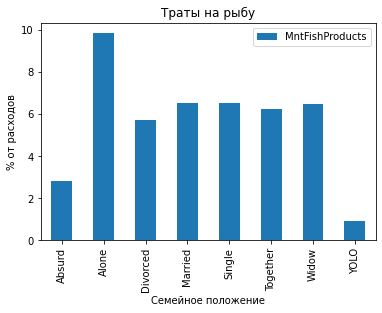

In [35]:
marital_df = df[['Marital_Status']]

marital_df['MntFishProducts'] = df['MntFishProducts'] / df['People_Count']/  df['Mnt'] * 100

pl = marital_df.groupby('Marital_Status').mean().plot(kind='bar')
pl.set_xlabel('Семейное положение')
pl.set_ylabel('% от расходов')
pl.set_title("Траты на рыбу")
# Исходя из статистики, люди со статусом Alone больше тратят на рыбу большую часть своего заработка

Text(0, 0.5, 'Траты на вина')

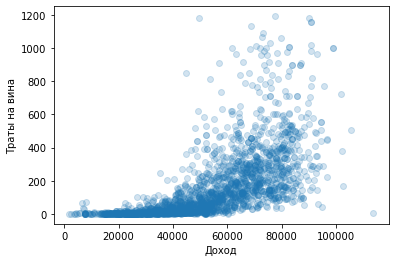

In [20]:

wines = df[['Income']]
wines['MntWines'] = df['MntWines'] / df['People_Count']
wines.groupby('Income')
fig, ax = plt.subplots() 
ax.scatter(wines['Income'], wines['MntWines'],alpha = 0.2);
ax.set_xlabel('Доход')
ax.set_ylabel('Траты на вина')

# По графику видно, что люди, которые больше зарабатывают, больше тратят на вина

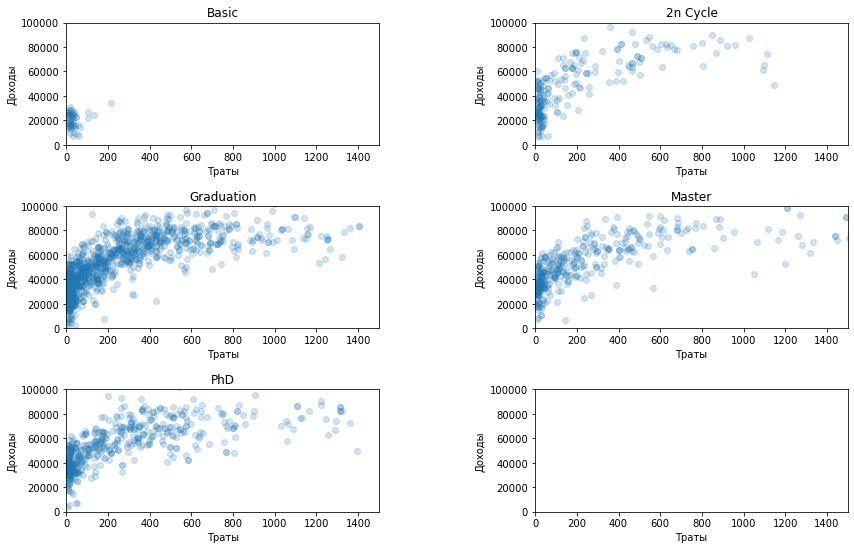

In [33]:
df_b = df[['Income', 'Mnt', 'Education']]
df_b = df_b[df_b['Education'] == 'Basic']
df_b.drop(columns = ['Education'],axis = 1)

df_c = df[['Income', 'Mnt', 'Education']]
df_c = df_c[df_c['Education'] == '2n Cycle']
df_b.drop(columns = ['Education'],axis = 1)


df_g = df[['Income', 'Mnt', 'Education']]
df_g = df_g[df_g['Education'] == 'Graduation']
df_b.drop(columns = ['Education'],axis = 1)

df_m = df[['Income', 'Mnt', 'Education']]
df_m = df_m[df_m['Education'] == 'Master']
df_m.drop(columns = ['Education'],axis = 1)

df_p = df[['Income', 'Mnt', 'Education']]
df_p = df_p[df_p['Education'] == 'PhD']
df_p.drop(columns = ['Education'],axis = 1)



fig, ax = plt.subplots(3,2, figsize=(14,9))
plt.subplots_adjust(wspace = 0.5, hspace = 0.5 )


ax[0][0].scatter(df_b['Mnt'],df_b['Income'] ,alpha = 0.2)
ax[0][0].title.set_text('Basic')



ax[0][1].scatter(df_c['Mnt'],df_c['Income'] ,alpha = 0.2)
ax[0][1].title.set_text('2n Cycle')



ax[1][0].scatter(df_g['Mnt'],df_g['Income'] ,alpha = 0.2)
ax[1][0].title.set_text('Graduation')



ax[1][1].scatter(df_m['Mnt'],df_m['Income'] ,alpha = 0.2)
ax[1][1].title.set_text('Master')


ax[2][0].scatter(df_p['Mnt'],df_p['Income'] ,alpha = 0.2)
ax[2][0].title.set_text('PhD')


for x in range(3):
    for y in range(2):
        ax[x,y].set_xlabel('Траты')
        ax[x,y].set_ylabel('Доходы')
        ax[x,y].axis(ymin=0,ymax=100000)
        ax[x,y].axis(xmin=0,xmax=1500)



# Исходя из графиков можно сделать вывод, что доход зависит от образования. 
# Люди с более высоким уровнем образования часто больше тратят на покупки

## Задание 7 (1 балл): немного исследований

Попробуйте найти в данных какую-то классную интересную особенность. Может быть, рыбу едят только неженатые? Или самый большой заработок и потребление фруктов у людей без образования? Приведите все расчеты, и визуализации для обнаруженного факта. Он должен быть правда интересным и удивлять! Попробуйте описать, почему (как вам кажется) так получилось.

In [22]:
# Ваш код и комментарий